In [301]:
import pandas as pd
import sklearn 
import matplotlib
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [302]:
train_data = pd.read_csv('train_data_model.csv')
test_data = pd.read_csv('test_data_model.csv')
td = pd.concat([train_data, test_data], ignore_index=True, sort = False)

In [303]:
X_train = train_data[['DirectoryCount','FileCategory']]
Y_train = train_data['WarningFlag']
X_test = test_data[['DirectoryCount','FileCategory']]

<Axes: xlabel='DirectoryCount'>

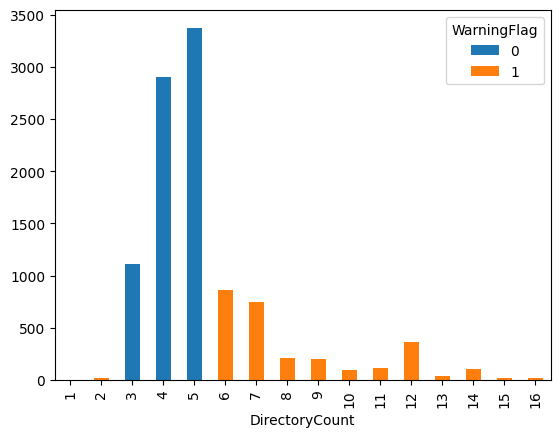

In [304]:
train_data.pivot_table('FileId', 'DirectoryCount', 'WarningFlag', 'count').plot(kind='bar', stacked=True)

<Axes: xlabel='FileCategory'>

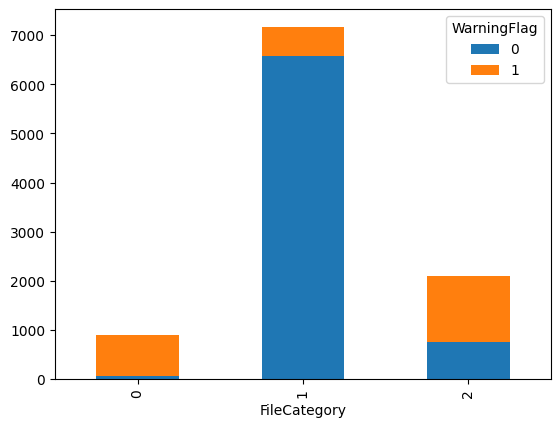

In [305]:
train_data.pivot_table('FileId', 'FileCategory', 'WarningFlag', 'count').plot(kind='bar', stacked=True)

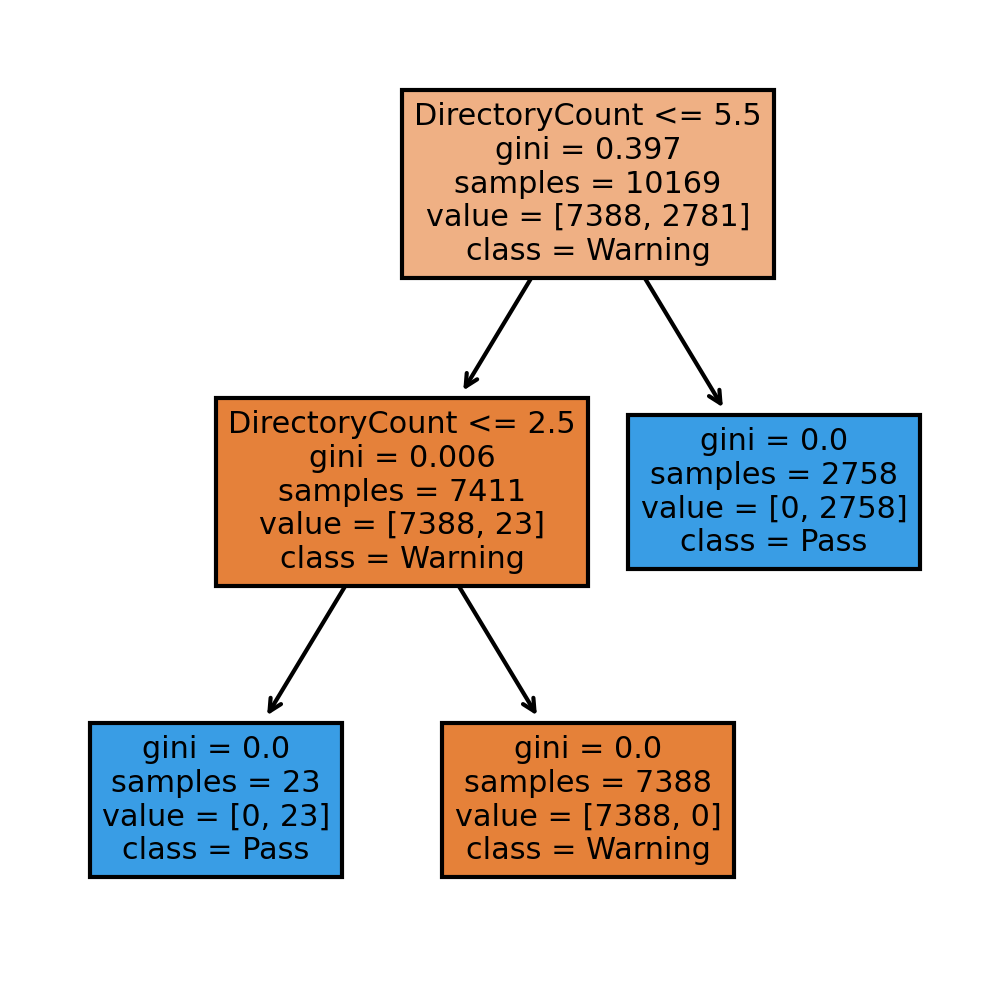

In [306]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
clf = dt.fit(X_train, Y_train)

fn=['DirectoryCount','FileCategory']
cn=['Warning', 'Pass']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True);

In [309]:
%%time
from sklearn.model_selection import GridSearchCV
cls = DecisionTreeClassifier()
#parameters = {'min_samples_split': range(2,40), 'max_depth': range(1,10), 'criterion': ["gini", "entropy", "log_loss"], 'min_samples_leaf': range(1,10) }
parameters = {'criterion': ["gini", "entropy", "log_loss"], 'min_samples_leaf': range(1,10) }
search = GridSearchCV(clf, parameters, scoring='f1_micro')
search.fit(X_train, Y_train)
best_tree = search.best_estimator_

CPU times: total: 1.47 s
Wall time: 1.59 s


In [310]:
Y_pred = best_tree.predict(X_test)

In [311]:
#добавляем расчитанный столбец в тестовый фрейм 
rezult_data = test_data.assign(WarningFlag = Y_pred)
#сохраняем фрейм в файл
rezult_data.to_csv('rezult_data.csv', index=False)